In [72]:
import pandas as pd

In [73]:
dataset=pd.read_csv("https://raw.githubusercontent.com/RamishaRaniK/dataset/main/Salary_Data.csv")

In [74]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
indep=dataset[["YearsExperience"]]

In [5]:
indep

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [6]:
dep=dataset[["Salary"]]

In [7]:
dep

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [8]:
import matplotlib.pyplot as plt

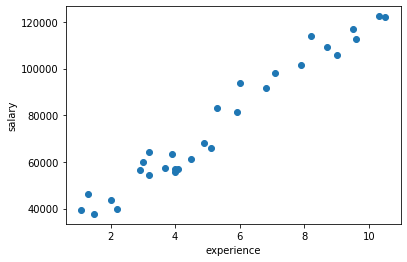

In [12]:
plt.scatter(indep,dep)
plt.xlabel("experience")
plt.ylabel("salary")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(indep,dep,test_size=0.30,random_state=0)

In [26]:
X_train.shape

(21, 1)

In [27]:
len(X_train)

21

In [28]:
X_train

,YearsExperience
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5
6,3.0


In [30]:
y_test.shape

(9, 1)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor=LinearRegression()

In [33]:
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
weight=regressor.coef_

In [35]:
weight

array([[9360.26128619]])

In [36]:
bais=regressor.intercept_

In [37]:
print(bais)

[26777.3913412]


In [38]:
y_pred=regressor.predict(X_test)

In [39]:
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [43]:
predActual=pd.DataFrame(index=range(0,10))

In [49]:
y_test.index=range(0,9)

In [50]:
y_test

,Salary
0,37731.0
1,122391.0
2,57081.0
3,63218.0
4,116969.0
5,109431.0
6,112635.0
7,55794.0
8,83088.0


In [56]:
predActual["ActualValue"]=y_test

In [61]:
y_pred_table=pd.DataFrame(y_pred,columns=["Pred"])

In [62]:
y_pred_table

,Pred
0,40817.783270
1,123188.082589
2,65154.462615
3,63282.410357
4,115699.873560
5,108211.664531
6,116635.899689
7,64218.436486
8,76386.776158


In [63]:
predActual["PredValue"]=y_pred_table

In [64]:
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [65]:
predActual

,ActualValue,PredValue
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158
9,NaN,NaN


In [66]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)


In [67]:
r

0.9740993407213511

In [68]:
import pickle
filename="finalModel.sav"
pickle.dump(regressor,open(filename,'wb'))

In [69]:
load_model=pickle.load(open("finalModel.sav",'rb'))

In [70]:
result=load_model.predict([[15]])

C:\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [71]:
result

array([[167181.3106341]])

In [75]:
dir(pd)

['Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseDtype',
 'SparseSeries',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_np_version_under1p16',
 '_np_version_under1p17',
 '_tslib